### This is a logistic regression problem used to determine the probability of diabetes based select features

# CDC_Capstone:  Part III - Feature Engineering


Purpose of Part III:
1- Replace codes with label for better interprepation of data
2- Create datasets needed for the dashboard notebook

In [1]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

 
# Statistics imports
from scipy import stats
#import statsmodels.api as sm

import csv
#import import_ipynb
import pandas as pd

 

In [2]:
#save functions and data source
#%run my_functions.ipynb
from prepare import PrepareData
#Testing - Read local data
prepared_data = PrepareData(download_new=False)

 
# Why?  reading from your local directory  is much faster
#run will do the follow:

1. take a list of names. For example: ['menhealth','menhealth','physical','dietary,heart','sex,edu','all']
2. each name will call another function to read the local directory and retrieve the CSV adn return it as a df
note the directory name is defined in the run function found in my_functions file
3.  The data frame key will be the name.  Key, data will be the dataframe
4. The dictiionary of dataframes will be returned.  

In [3]:
#read in all the data from your local directory.
data = prepared_data.run()
 

In [4]:
#Each dictionary keys include a sample subset of data with a total of 500 records with the exception of all.  All includes all the records.  They include 'menhealth','menhealth','physical','dietary','heart','sex','edu','all' 
#confirm 1 dictionary key 
data['menhealth']

,Diabetes_binary,Type,MentHlth,Gender
0,0,nondiabetic,5,women
1,0,nondiabetic,25,men
2,1,diabetic,0,men
3,1,diabetic,15,men
4,0,nondiabetic,0,men
...,...,...,...,...
495,0,nondiabetic,2,women
496,0,nondiabetic,0,men
497,0,nondiabetic,0,women
498,0,nondiabetic,4,men


# My New Naming Convention

## `people`

In [5]:
#need to convert the dictionary ["all"]  to a dataframe.  remeber, all is the key
people = data['all']
people.head(2)



,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Sex,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education
0,215265,0,0,1,0,30,1,0,0,1,...,0,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED
1,141614,0,0,0,1,35,1,0,0,1,...,1,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED


I  will use the name `people` to refer to the separate gender groups of people in our data.

### gender: 
* `"men"` - represents all data for men - where sex == 1
* `"women"` - represents all data for women  - where sex == 2




In [6]:
#Obervation
# 0 - Male
# 1- Female

people.groupby(by = ['Sex']).count()[['Diabetes_binary']]

,Diabetes_binary
Sex,
0,141974
1,111706


In [7]:
#Using np.where for Conditional Replacement
#NumPy's where function can also be used for conditional replacements:
# Replace values in 'Sex'  with 'men' where the value is 0.  other will be women
people['Gender'] = np.where(people['Sex'] ==0, 'men', 'women')
people.head()



,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Sex,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education
0,215265,0,0,1,0,30,1,0,0,1,...,0,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED
1,141614,0,0,0,1,35,1,0,0,1,...,1,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED
2,28979,0,0,0,1,25,0,0,0,1,...,0,10,2,1,men,nondiabetic,Very good,nondiabetic,<10K,1-8
3,123066,1,0,1,1,45,0,0,0,0,...,0,4,3,1,men,diabetics,Fair,diabetic,<10K,9-11
4,36247,0,0,0,1,28,0,0,0,1,...,1,13,6,1,women,nondiabetic,Good,nondiabetic,<10K,C4+


### `Types`

We will use the name `kind` to refer to the two different kinds of people.

* `"diabetics"`
* `"nondiabetics"`


In [8]:
# Replace the value 2 in column 'column1' with 5
people['Type'] = np.where(people['Diabetes_binary'] ==0, 'nondiabetic', 'diabetic')


In [9]:
#Obervation
# 0 - nondiabetic
# 1- diabetic

people.groupby(by = ['Type']).count()[['Diabetes_binary']]

,Diabetes_binary
Type,
diabetic,35346
nondiabetic,218334


### Add Labels to represent General Health

In [10]:
#definitions variable will be used in RFC table below to view cm matrix results
#1 Excellent
#2 Very good
#3 Good
#4 Fair
#5 Poor
#7 Don’t know/Not Sure 9 Refused
 
definitions = pd.Series([0, "Excellent", "Very good", "Good", "Fair","Poor","UNKNOWN"], dtype="category")

In [11]:

reversefactor = dict(zip(range(7),definitions))
reversefactor

{0: 0,
 1: 'Excellent',
 2: 'Very good',
 3: 'Good',
 4: 'Fair',
 5: 'Poor',
 6: 'UNKNOWN'}

In [12]:
people['GeneralHealth'] = np.vectorize(reversefactor.get)(people[['GenHlth']])
#y_pred_v = np.vectorize(reversefactor.get)(y_pred)

In [13]:
people.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [14]:
#convert back to dataframe
people.head()
 

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Sex,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education
0,215265,0,0,1,0,30,1,0,0,1,...,0,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED
1,141614,0,0,0,1,35,1,0,0,1,...,1,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED
2,28979,0,0,0,1,25,0,0,0,1,...,0,10,2,1,men,nondiabetic,Very good,nondiabetic,<10K,1-8
3,123066,1,0,1,1,45,0,0,0,0,...,0,4,3,1,men,diabetics,Fair,diabetic,<10K,9-11
4,36247,0,0,0,1,28,0,0,0,1,...,1,13,6,1,women,nondiabetic,Good,nondiabetic,<10K,C4+


In [15]:
#Verified counts are the same

df_gen_h = people.groupby(by = ['GeneralHealth','GenHlth']).count()[['Diabetes_binary']]
df_gen_h

,,Diabetes_binary
GeneralHealth,GenHlth,
Excellent,1,45299
Fair,4,31570
Good,3,75646
Poor,5,12081
Very good,2,89084


In [16]:
people = people.sort_values(by='Type', ascending=False)


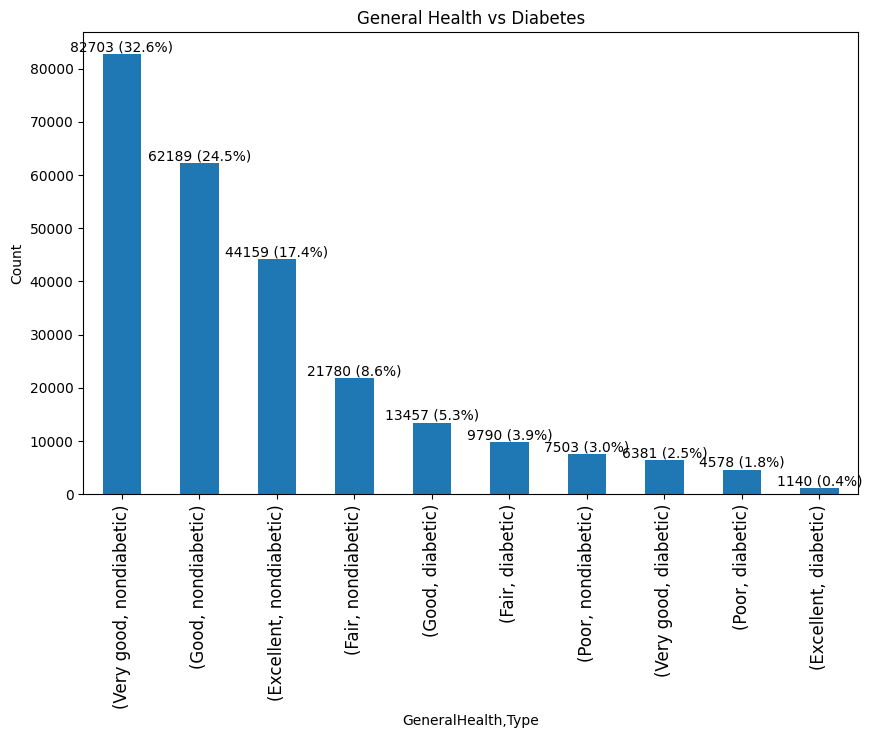

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
 
df = people[["GeneralHealth","Type"]]

# Calculate counts and percentages
counts = df[["GeneralHealth","Type"]].value_counts()
percentages = (counts / len(df)) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar')

# Add percentage labels
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, f'{v} ({percentages[i]:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.title('General Health vs Diabetes')
plt.show()

Question:What percentage of people have good health and have diabetis compared to others? 5.3%


Individuals in good health can still get diabetes

### Feature Engineer Labels for Income

In [18]:
#definitions variable will be used in RFC table below to view cm matrix results

 
definitions = pd.Series([0, "<10K", "10-15K", "15-20K", "20-25K","25K-35K","35-50K","50-75K","75>"], dtype="category")

In [19]:

reversefactor = dict(zip(range(9),definitions))
reversefactor

{0: 0,
 1: '<10K',
 2: '10-15K',
 3: '15-20K',
 4: '20-25K',
 5: '25K-35K',
 6: '35-50K',
 7: '50-75K',
 8: '75>'}

In [20]:
people['income'] = np.vectorize(reversefactor.get)(people[['Income']])
 

In [21]:
people[['income','Income']].head(5)

,income,Income
0,<10K,1
158667,35-50K,6
158228,35-50K,6
158230,35-50K,6
158231,35-50K,6


In [22]:
#Verified counts are the same

df_income_cnt  = people.groupby(by = ['income','Income']).count()[['Diabetes_binary']]
df_income_cnt 

,,Diabetes_binary
income,Income,
10-15K,2,11783
15-20K,3,15994
20-25K,4,20135
25K-35K,5,25883
35-50K,6,36470
50-75K,7,43219
75>,8,90385
<10K,1,9811


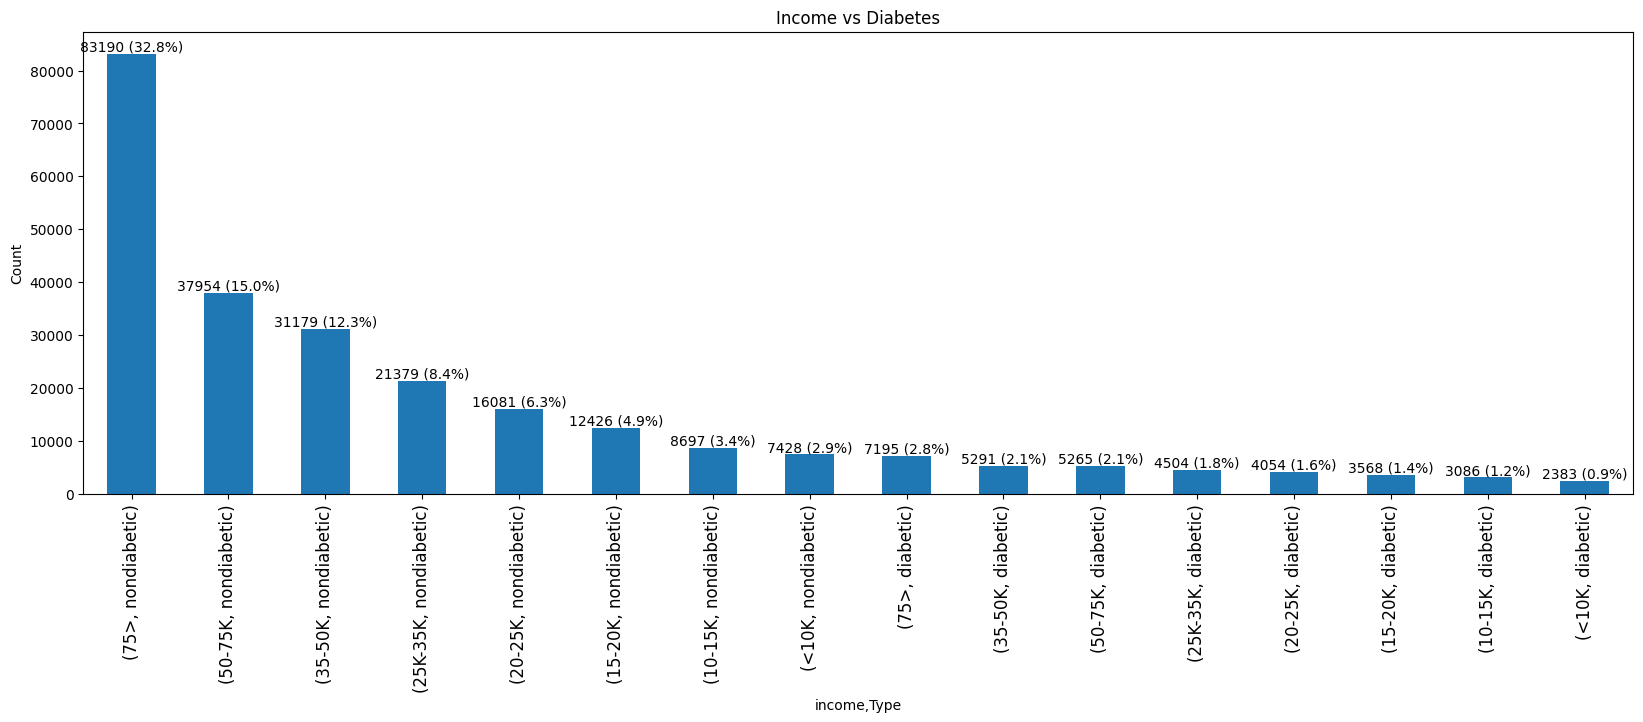

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
 
df = people[["income","Type"]]

# Calculate counts and percentages
counts = df[["income","Type"]].value_counts()
percentages = (counts / len(df)) * 100

# Create the bar chart
plt.figure(figsize=(20, 6))
ax = counts.plot(kind='bar')

# Add percentage labels
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, f'{v} ({percentages[i]:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.title('Income vs Diabetes')
plt.show()

Question: How many people with high income have diabetis compared to others?  Of the individuals that have an income higher than 75K ,  2.8% are diabetic 

In [24]:
people.columns


Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [25]:
people = people.sort_values(by='income', ascending=False)

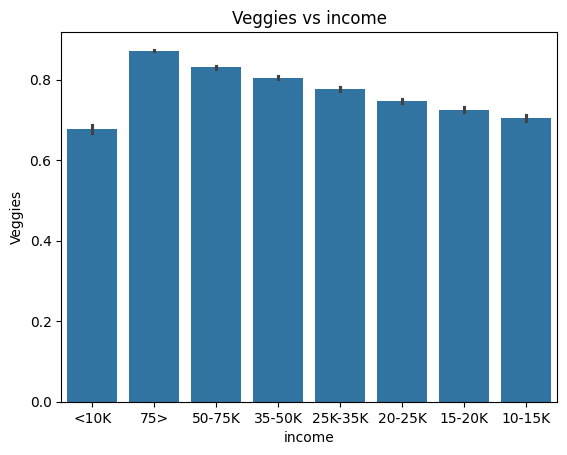

In [26]:
sns.barplot(y='Veggies', x='income',data=people)
 
# Add a title
plt.title("Veggies vs income")
plt.show()

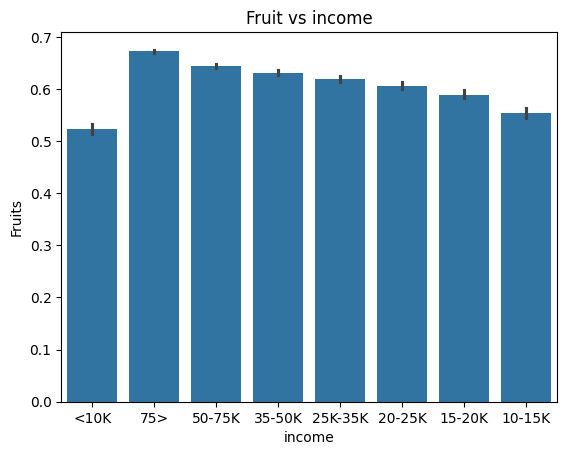

In [27]:
sns.barplot(y='Fruits', x='income',data=people)
 
# Add a title
plt.title("Fruit vs income")
plt.show()

People in the income range of 70K eat more fruits and veggies and have less percentage of diagnosed  


In [28]:
people.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

### Feature Engineer Labels for Education

In [29]:
#PhysHlth  DiffWalk  Sex  Age  Education  Income  
#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

In [30]:
#definitions variable will be used in RFC table below to view cm matrix results

 
definitions = pd.Series([0, "None", "1-8", "9-11", "12orGED","C1-3","C4+"], dtype="category")

In [31]:

reversefactor = dict(zip(range(7),definitions))
reversefactor

{0: 0, 1: 'None', 2: '1-8', 3: '9-11', 4: '12orGED', 5: 'C1-3', 6: 'C4+'}

In [32]:
people['education'] = np.vectorize(reversefactor.get)(people[['Education']])
 

In [33]:
# Convert to DataFrame
df_education_label = pd.DataFrame(people, columns=['education']).reindex()

In [34]:
df_education_label.head(2)

,education
0,12orGED
5082,C4+


In [35]:
people[[ 'Education','education','GenHlth','Diabetes_binary','HighBP','HighChol']].head()

,Education,education,GenHlth,Diabetes_binary,HighBP,HighChol
0,4,12orGED,3,0,0,1
5082,6,C4+,2,0,0,0
5912,5,C1-3,5,0,1,0
5913,4,12orGED,3,0,1,0
5080,3,9-11,4,0,1,0


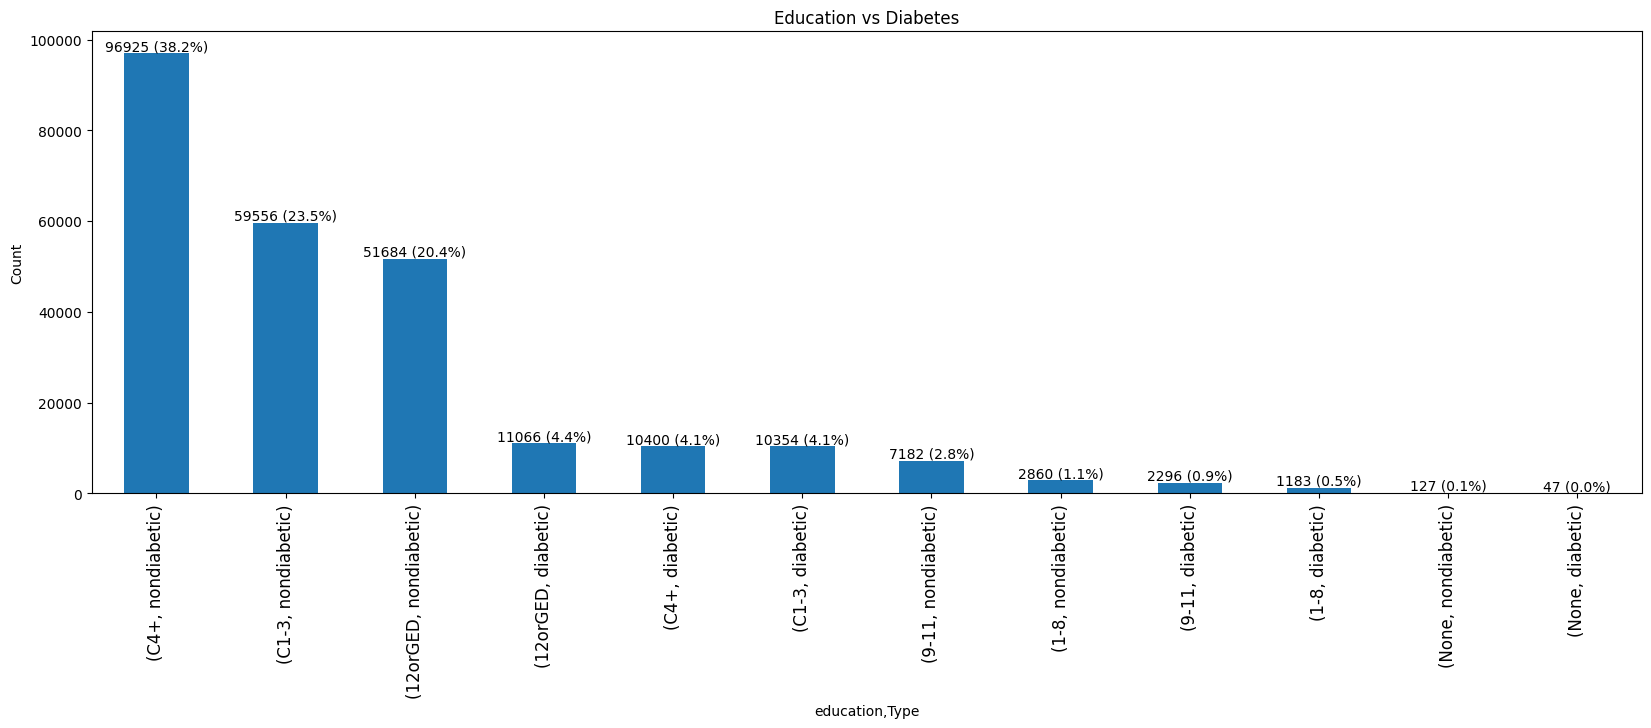

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
 
df = people[["education","Type"]]

# Calculate counts and percentages
counts = df[["education","Type"]].value_counts()
percentages = (counts / len(df)) * 100

# Create the bar chart
plt.figure(figsize=(20, 6))
ax = counts.plot(kind='bar')

# Add percentage labels
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, f'{v} ({percentages[i]:.1f}%)', ha='center', va='bottom')

plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.title('Education vs Diabetes')
plt.show()

Question: How many people with higher education have diabetis compared to others
? 10,400 (4.1%)

### Export Data for dashboard¶

In [37]:
people.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [38]:
new_columns = ['Diabetes_binary','Gender', 'Types','MentHlth', 'GeneralHealth', 'Type',
       'income', 'education','Sex','PhysHlth','PhysActivity','Fruits',
       'Veggies','HeartDiseaseorAttack']

In [39]:
#create a dictionary. Save all my dataframes to my dictionary
# Choose a random sample of 2 rows
sample_df = pd.DataFrame(people.sample(n=500),columns = new_columns)

In [40]:
sample_df.head()

,Diabetes_binary,Gender,Types,MentHlth,GeneralHealth,Type,income,education,Sex,PhysHlth,PhysActivity,Fruits,Veggies,HeartDiseaseorAttack
221299,0,men,nondiabetic,14,Good,nondiabetic,20-25K,9-11,0,0,1,1,1,0
106871,0,men,nondiabetic,0,Excellent,nondiabetic,50-75K,C4+,0,0,1,1,1,0
157903,0,men,nondiabetic,0,Excellent,nondiabetic,35-50K,C4+,0,0,1,1,1,0
78286,0,women,nondiabetic,0,Excellent,nondiabetic,75>,12orGED,1,0,1,1,1,0
131643,1,women,diabetics,0,Good,diabetic,50-75K,12orGED,1,0,0,1,1,1


In [41]:
#write update file to drive
data_dic = {}

In [42]:
#create a subset of data
data_dic['menhealth_data'] = sample_df[['Diabetes_binary','Type', 'MentHlth','Gender' ]]

In [43]:
#create a subset of data
data_dic['genhealth_data'] = sample_df[['Diabetes_binary','Type','GeneralHealth', 'Gender' ]]

In [44]:
#Obervation
# 0 - No_PhysicalActivity
# 1- Yes_PhysicalActivity

people.groupby(by = ['PhysActivity']).count()[['Diabetes_binary']]

,Diabetes_binary
PhysActivity,
0,61760
1,191920


In [45]:

#bin - I choose to keep my bins under 20.  I wrote function to calculate the range and reture
# an approprite bin number
#1. Get the range = Max - min
#2. Calcute the bin :  range divided by multiple of 5 until the nbr is less than 20
#3.  round up to the nearest integer

def appropriate_bin_nbr(max_, min_):
    
     
    if (max_ - min_) / 5 < 20:
        return  int(round((max_ - min_) / 5,0))
    elif (max_ - min_) / 10 < 20:
          return   int(round((max_ - min_) / 10,0))
    elif (max_ - min_) / 15 < 20:
          return   int(round((max_ - min_) / 15,0))
    else:
         return    int(round((max_ - min_) / 20,0))
    
bin_nbr =  appropriate_bin_nbr(people.PhysHlth.sort_values().max(),people.PhysHlth.sort_values().min())
bin_nbr

6

Text(0.5, 0, 'PhysHlth')

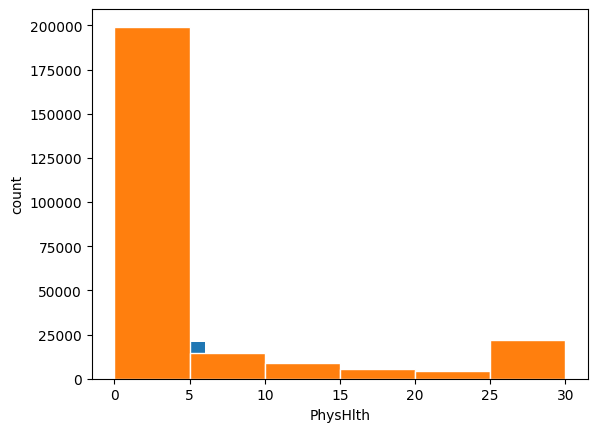

In [46]:
people.PhysHlth.plot(kind='hist')
# using loc method- create histogram using loc method
#1. grab all duations so we will have a series
#2. plot with a histogram

people.loc[:,"PhysHlth"].plot(kind='hist',bins=bin_nbr, edgecolor='white');
plt.ylabel('count');
plt.xlabel('PhysHlth')

In [47]:
def summary_statistics(column, data):
    X = data[column]
    print ('COLUMN: ' + column)
    print ('mean: ' + str(np.mean(X)))
    print ('median: ' + str(np.median(X)))
    print ('mode: ' + str(stats.mode([round(d) for d in X])))
    print ('variance: ' + str(np.var(X)))
    print ('standard deviation: ' + str(np.std(X)))

In [48]:
#Obervation
#1 - Number of days  
#88 None  
#77 unknown
#99 Refused

#Identify a normal distribution within a data set using summary statistics and data visualizations
summary_statistics('PhysHlth', people)

COLUMN: PhysHlth
mean: 4.2420805739514345
median: 0.0
mode: ModeResult(mode=0, count=160052)
variance: 76.00237539369706
standard deviation: 8.717934124188888


Statistics show on average 4 day in the past 30 days individuals have not had good physical health  

In [49]:
people.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [50]:
data_dic['dietary_data'] = sample_df[['Diabetes_binary', 'Fruits','Veggies','Gender','Types']]  

In [51]:
data_dic['heart_data'] = sample_df[['Diabetes_binary','HeartDiseaseorAttack' , 'Gender','Type' ]]

In [52]:
data_dic['sex_data'] = sample_df[['Diabetes_binary', 'Gender']]

In [53]:
data_dic['edu_data'] = sample_df[['Diabetes_binary', 'education','Type']]

In [54]:
#all data
#data_dic['all_data'] = people

In [55]:
#Write file to local directory
prepared_data.write_data(data, 'data/prepared',index=True )

In [61]:
#save these dataframes to my data/raw folder on my local drive 
prepared_data.write_data(data_dic,'data/raw',index=False)

## Filter for fewer rows and  columns: 

testing code for my select_columns(df) function

In [63]:
# Choose a random sample of 2 rows
sample_df = pd.DataFrame(people.sample(n=300),columns = people.columns)

In [64]:
labels = ['Diabetes_binary','Gender', 'Types','MentHlth', 'GeneralHealth', 'Type',
       'income', 'education','Sex','PhysHlth','PhysActivity','Fruits',
       'Veggies','HeartDiseaseorAttack']

In [65]:
cols = people.columns

In [66]:
type(cols)

pandas.core.indexes.base.Index

In [67]:
filt = cols.isin(labels)

In [68]:
sample_df.loc[:, filt]

,Diabetes_binary,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,MentHlth,PhysHlth,Sex,Gender,Types,GeneralHealth,Type,income,education
37091,0,0,0,0,1,0,0,1,women,nondiabetic,Excellent,nondiabetic,75>,12orGED
88440,0,0,1,0,1,0,0,1,women,nondiabetic,Excellent,nondiabetic,75>,C4+
125214,0,0,0,1,1,20,30,1,women,nondiabetic,Fair,nondiabetic,50-75K,12orGED
35674,0,0,1,0,1,0,0,0,men,nondiabetic,Good,nondiabetic,75>,C1-3
214547,1,1,1,0,0,0,0,1,women,diabetics,Fair,diabetic,20-25K,9-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54533,0,0,1,1,1,0,0,0,men,nondiabetic,Excellent,nondiabetic,75>,C4+
160249,0,0,1,0,1,30,30,1,women,nondiabetic,Poor,nondiabetic,35-50K,C4+
242301,0,0,1,1,1,0,0,1,women,nondiabetic,Fair,nondiabetic,10-15K,12orGED
120506,0,0,1,0,1,0,0,0,men,nondiabetic,Good,nondiabetic,50-75K,12orGED


#### Desired result

In [ ]:
import pandas as pd

# Assuming your DataFrame 'people' has columns 'GeneralHealth' and 'Type'

# Filter data for relevant columns
df = people[["GeneralHealth", "Type"]]

# Calculate counts using value_counts()
counts = df["GeneralHealth"].value_counts().to_frame(name="Count")

# Calculate percentages (optional)
#if you want percentages:
percentages = (counts["Count"] / len(df)) * 100
counts["Percentage"] = percentages.apply("{:.1f}%".format)  # Format as percentages

# Display the table
print(counts)

## Repeating loop function

In [72]:
%run my_functions.ipynb

In [73]:
people.shape 

(253680, 29)

In [74]:
people.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [75]:
#Expected results

people.groupby(["Types", "GeneralHealth", "Gender"])["Diabetes_binary"].agg(['count', 'mean']).reset_index()


,Types,GeneralHealth,Gender,count,mean
0,diabetics,Excellent,men,449,1.0
1,diabetics,Excellent,women,691,1.0
2,diabetics,Fair,men,5529,1.0
3,diabetics,Fair,women,4261,1.0
4,diabetics,Good,men,6865,1.0
5,diabetics,Good,women,6592,1.0
6,diabetics,Poor,men,2551,1.0
7,diabetics,Poor,women,2027,1.0
8,diabetics,Very good,men,3017,1.0
9,diabetics,Very good,women,3364,1.0


### Testing my class
Lastly, create prepare.py file and add all my functions
Better to view py file in pycharm so you done mess up the formatting incase you have to make changes


In [76]:
from prepare import PrepareData

### Testing reading local data

In [77]:
#Testing - Read local data
prepare_data = PrepareData(download_new=False)

In [78]:
#will return these dataframe already cleaned and transformed
# 'menhealth','menhealth','physical','dietary','heart','sex','edu','all' 
data = prepare_data.run()


In [79]:
data['menhealth'].head()

,Diabetes_binary,Type,MentHlth,Gender
0,0,nondiabetic,14,men
1,0,nondiabetic,0,men
2,0,nondiabetic,0,men
3,0,nondiabetic,0,women
4,1,diabetic,0,women


In [80]:
data['all'].head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Sex,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education
0,215265,0,0,1,0,30,1,0,0,1,...,0,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED
1,141614,0,0,0,1,35,1,0,0,1,...,1,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED
2,28979,0,0,0,1,25,0,0,0,1,...,0,10,2,1,men,nondiabetic,Very good,nondiabetic,<10K,1-8
3,123066,1,0,1,1,45,0,0,0,0,...,0,4,3,1,men,diabetics,Fair,diabetic,<10K,9-11
4,36247,0,0,0,1,28,0,0,0,1,...,1,13,6,1,women,nondiabetic,Good,nondiabetic,<10K,C4+


In [81]:
 data['all'].shape

(253680, 29)